In [121]:
import numpy as np
from numpy.typing import NDArray
from scipy.linalg import null_space
import matplotlib.pyplot as plt

In [122]:
# KIRK 2019
XYZ_TO_LMS: NDArray = np.array(
    [
        [0.257085, 0.859943, -0.031061],
        [-0.394427, 1.175800, 0.106423],
        [0.064856, -0.076250, 0.559067],
    ]
)

# CIE RGB with E illuminant 
XYZ_TO_RGB: NDArray = np.array([
            [2.37, -0.9, -0.47],
            [-0.51, 1.4, 0.09],
            [0.005, -0.01, 1.01]
        ])
RGB_TO_XYZ = np.linalg.inv(XYZ_TO_RGB)
    
    
LMS_TO_MS: NDArray = np.array([
    [0, 1, 0],
    [0, 0, 1]
])
    
RGB_TO_MS = LMS_TO_MS @ XYZ_TO_LMS @ RGB_TO_XYZ
kernel = np.array(null_space(RGB_TO_MS)).reshape(-1)
print(kernel)

[-0.99930315  0.01803761  0.03267816]


In [123]:
def line_box_intersection(p, d):
    t_min = 0
    t_max = np.inf
    
    for i in range(3):
        if d[i] == 0:
            if p[i] < 0 or p[i] > 1:
                return None  # No intersection as line is parallel to slab with no overlap
        else:
            t1 = (0 - p[i]) / d[i]
            t2 = (1 - p[i]) / d[i]
            t_min = max(t_min, min(t1, t2))
            t_max = min(t_max, max(t1, t2))
            if t_min > t_max:
                return None  # No intersection
            if t_min == t_max:
                return p + t_min * d
    
    p_intersect_min = p + t_min * d
    p_intersect_max = p + t_max * d
    
    return p_intersect_min, p_intersect_max

In [124]:
n = 10
pairs = []
for p in [(0.8 , 0.8, 0), (0.8, 0, 0.8)]:
    intersections = line_box_intersection(p, kernel)
    if intersections is not None and len(intersections) == 2:
        pairs.append(intersections)

<IPython.core.display.Javascript object>


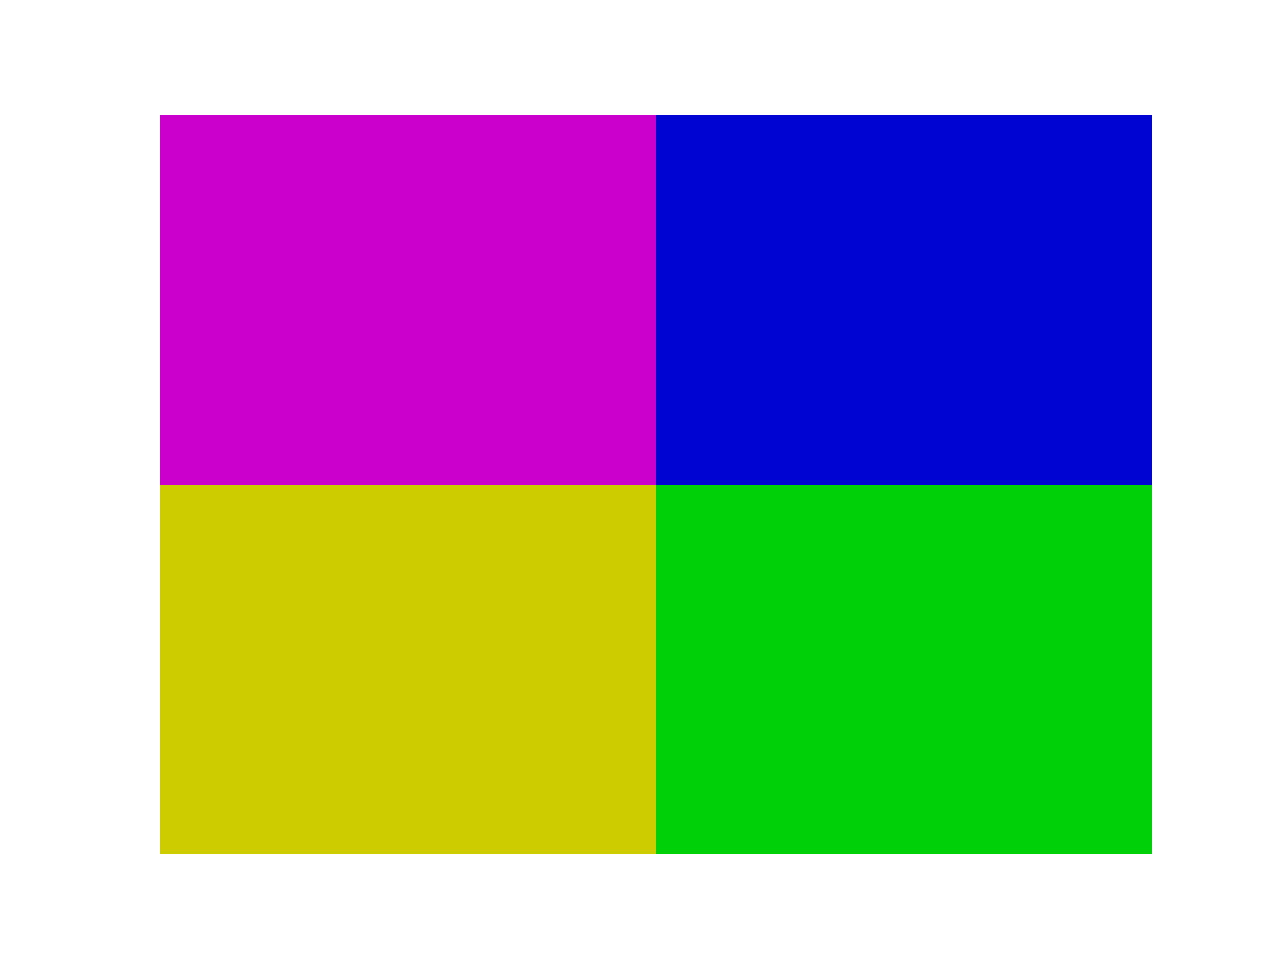

In [125]:
%matplotlib notebook

def show_confusions(pairs, save=False):
    fig, ax = plt.subplots()

    ax.set_xlim([0, 2])
    ax.set_ylim([0, len(pairs)])

    ax.axis('off')

    for i, (a,b) in enumerate(pairs):
        rect_a = plt.Rectangle((0, i), 1, 1, linewidth=1, edgecolor='none', facecolor=a.reshape(-1))
        rect_b = plt.Rectangle((1, i), 1, 1, linewidth=1, edgecolor='none', facecolor=b.reshape(-1))

        ax.add_patch(rect_a)
        ax.add_patch(rect_b)
    if save:
        fig.savefig(save)
    plt.show()
    
show_confusions(pairs)

In [126]:
n = 4
pairs2 = []

for i in range(n):
    for j in range(n):
        for p in [(1/2 + i / (2 * n), 1/2 + j / (2 * n), 0), ( 1/2 + i / (2*n), 0, 1/2 + j / (2*n))]: 
            intersections = line_box_intersection(p, kernel)
            if intersections is not None and len(intersections) == 2:
                pairs2.append(intersections)

print(len(pairs2))

32


<IPython.core.display.Javascript object>


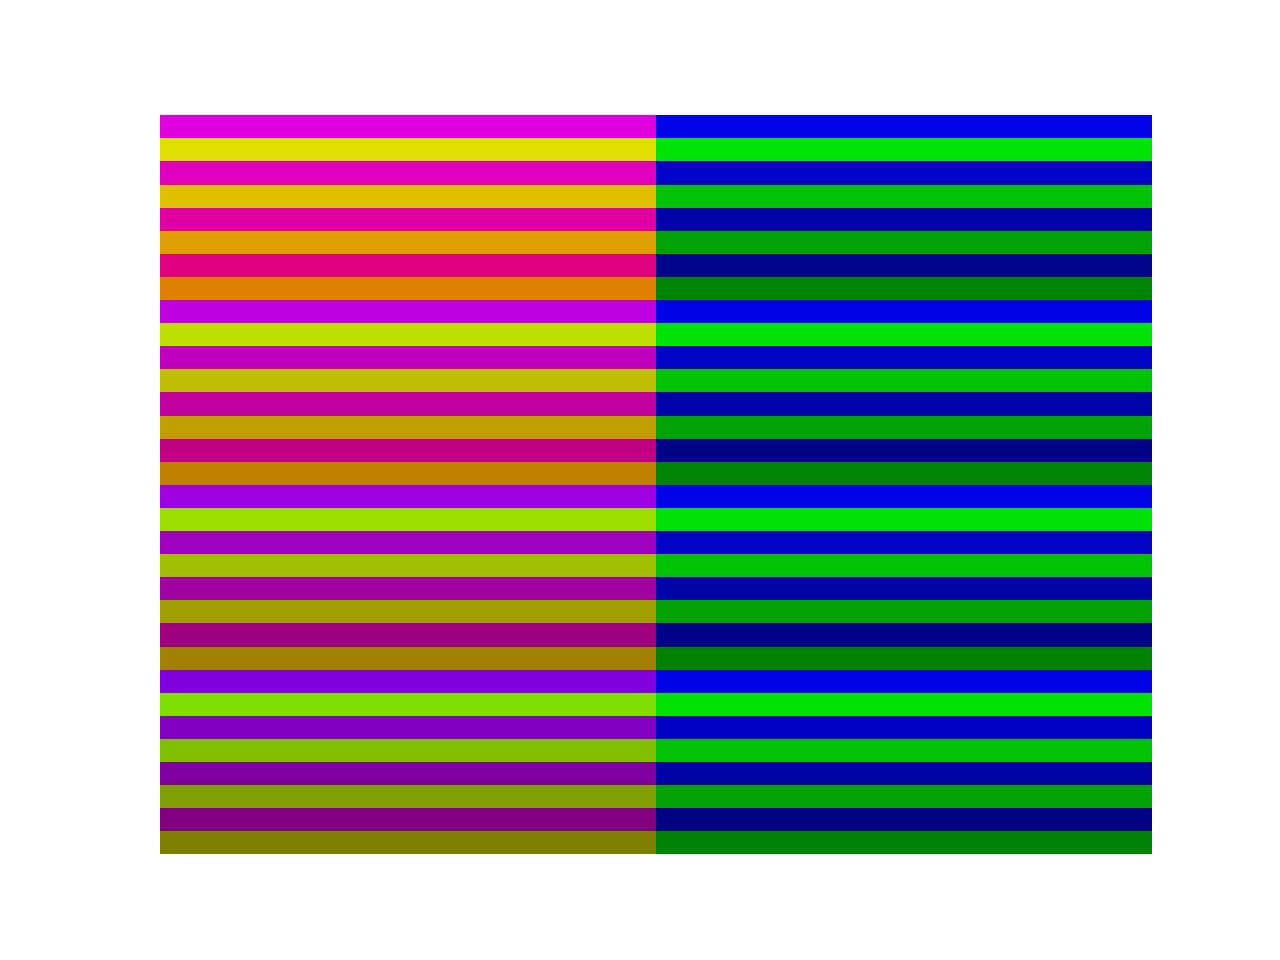

In [127]:
show_confusions(pairs2, save="rgb_metamers.png")